In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset=pd.read_csv("C:\\Users\\btlak\\Documents\\dataset\\classification\\prostate.csv")

In [3]:
dataset.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa',
       'Target'],
      dtype='object')

In [4]:
X=dataset.drop('Target',axis=1)
y=dataset['Target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

log_model=LogisticRegression(penalty='l2',solver='liblinear')

log_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [5]:
# checking for model calibration:

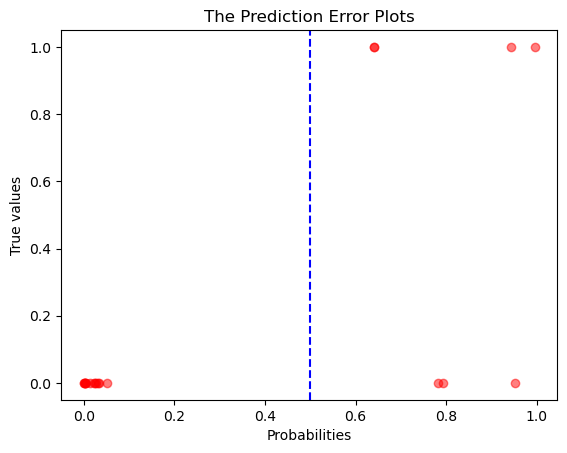

In [6]:
y_probs_test=log_model.predict_proba(X_test)[:,1]

plt.scatter(y_probs_test,y_test,color='red',alpha=0.5,label='Predictions')
plt.axvline(0.5,linestyle='--',color='blue',label='Decision Threshold')
plt.title("The Prediction Error Plots")
plt.xlabel("Probabilities")
plt.ylabel("True values")
plt.show()

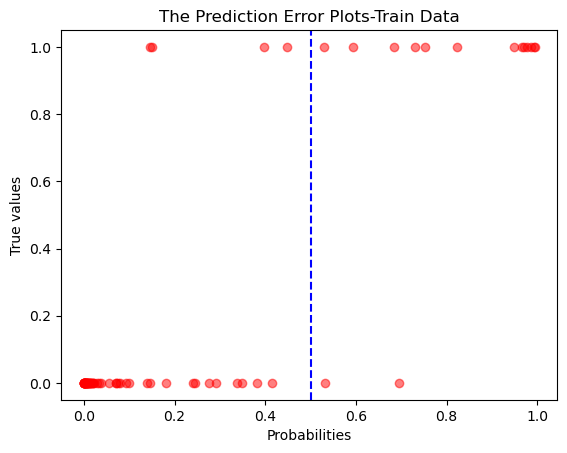

In [7]:
y_probs_train=log_model.predict_proba(X_train)[:,1]

plt.scatter(y_probs_train,y_train,color='red',alpha=0.5,label='Predictions')
plt.axvline(0.5,linestyle='--',color='blue',label='Decision Threshold')
plt.title("The Prediction Error Plots-Train Data")
plt.xlabel("Probabilities")
plt.ylabel("True values")
plt.show()

In [8]:
lift_df=pd.DataFrame({"y":y_test,"probs":y_probs_test}).sort_values("probs",ascending=False)

lift_df['cum_pos']=lift_df['y'].cumsum()

lift_df['x_lift']=(np.arange(len(lift_df))+1)/len(lift_df)

lift_df['y_lift']=lift_df['cum_pos']/lift_df['y'].sum()

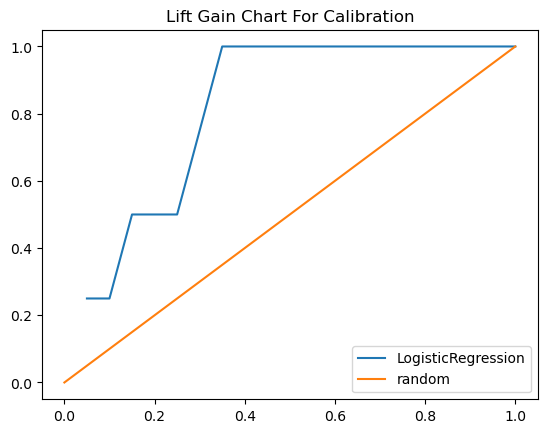

In [9]:
plt.plot(lift_df['x_lift'],lift_df['y_lift'],label="LogisticRegression")
plt.plot([0,1],[0,1],label='random')
plt.title("Lift Gain Chart For Calibration")
plt.legend()
plt.show()

In [10]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

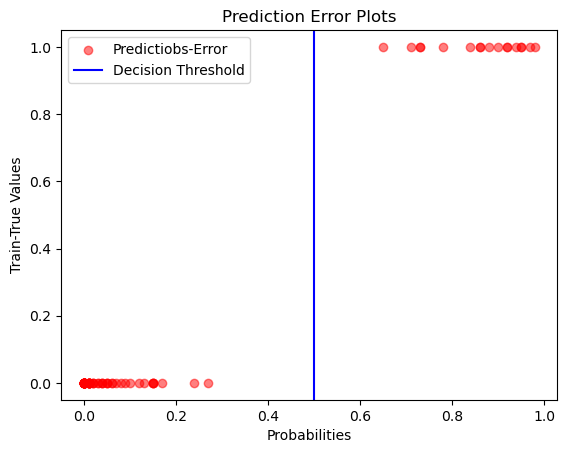

In [11]:
rf_probs_test=rf_model.predict_proba(X_test)[:,1]
rf_probs_train=rf_model.predict_proba(X_train)[:,1]

plt.scatter(rf_probs_train,y_train,alpha=0.5,color='red',label='Predictiobs-Error')
plt.axvline(0.5,color='blue',label='Decision Threshold')
plt.title("Prediction Error Plots")
plt.xlabel("Probabilities")
plt.ylabel("Train-True Values")
plt.legend()
plt.show()

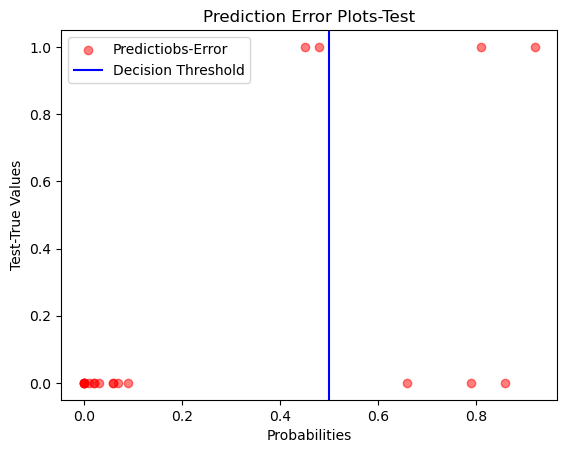

In [12]:
plt.scatter(rf_probs_test,y_test,alpha=0.5,color='red',label='Predictiobs-Error')
plt.axvline(0.5,color='blue',label='Decision Threshold')
plt.title("Prediction Error Plots-Test")
plt.xlabel("Probabilities")
plt.ylabel("Test-True Values")
plt.legend()
plt.show()

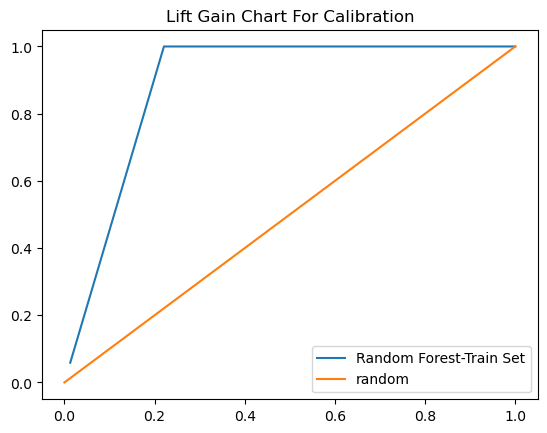

In [13]:
lift_rf=pd.DataFrame({"y":y_train,"probs":rf_probs_train}).sort_values("probs",ascending=False)

lift_rf['cum_pos']=lift_rf['y'].cumsum()

lift_rf['x_lift']=(np.arange(len(lift_rf))+1)/len(lift_rf)

lift_rf['y_lift']=lift_rf['cum_pos']/lift_rf['y'].sum()

plt.plot(lift_rf['x_lift'],lift_rf['y_lift'],label="Random Forest-Train Set")
plt.plot([0,1],[0,1],label='random')
plt.title("Lift Gain Chart For Calibration")
plt.legend()
plt.show()

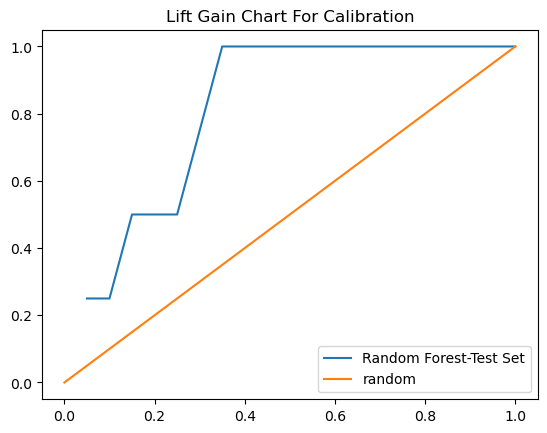

In [14]:
lift_rf=pd.DataFrame({"y":y_test,"probs":rf_probs_test}).sort_values("probs",ascending=False)

lift_rf['cum_pos']=lift_rf['y'].cumsum()

lift_rf['x_lift']=(np.arange(len(lift_rf))+1)/len(lift_rf)

lift_rf['y_lift']=lift_rf['cum_pos']/lift_rf['y'].sum()

plt.plot(lift_rf['x_lift'],lift_rf['y_lift'],label="Random Forest-Test Set")
plt.plot([0,1],[0,1],label='random')
plt.title("Lift Gain Chart For Calibration")
plt.legend()
plt.show()

In [15]:
#Model Disagreement Plots:

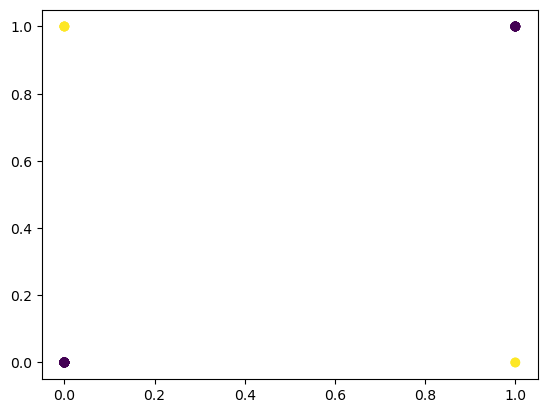

In [16]:
rf_preds=rf_model.predict(X_train)
log_preds=log_model.predict(X_train)

disagree=rf_preds != log_preds

plt.scatter(log_preds,rf_preds,c=disagree)
plt.show()

In [17]:
# Class-wise confidence histogram for model calibration:

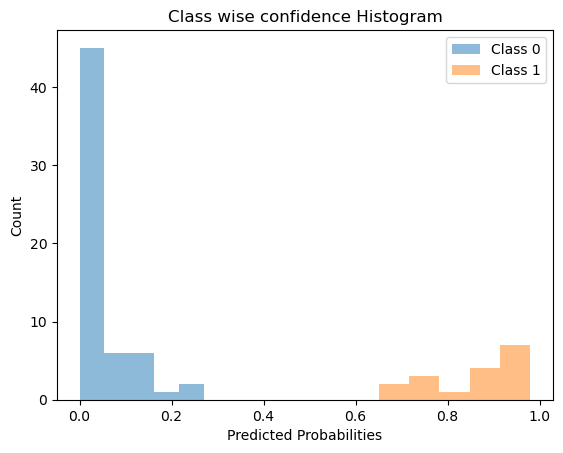

In [18]:
y_proba=rf_model.predict_proba(X_train)[:,1]

plt.hist(y_proba[y_train==0],bins=5,alpha=0.5,label="Class 0")
plt.hist(y_proba[y_train==1],bins=5,alpha=0.5,label="Class 1")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Count")
plt.title("Class wise confidence Histogram")
plt.legend()
plt.show()

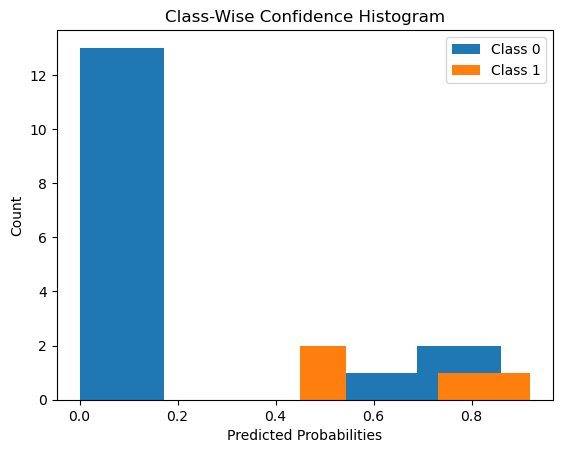

In [19]:
y_proba_test=rf_model.predict_proba(X_test)[:,1]

plt.hist(y_proba_test[y_test==0],bins=5,label="Class 0")
plt.hist(y_proba_test[y_test==1],bins=5,label="Class 1")
plt.title("Class-Wise Confidence Histogram")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Count")
plt.legend()
plt.show()

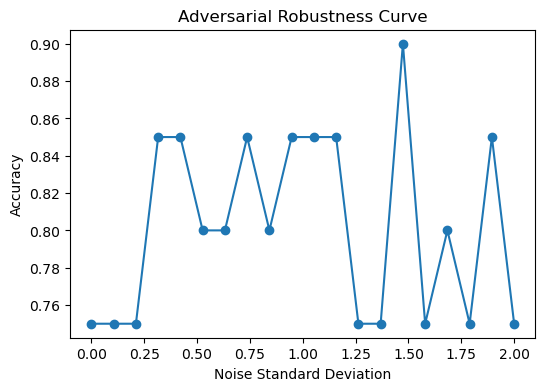

In [20]:
noise_levels = np.linspace(0,2,20)
accs = []
for nl in noise_levels:
    X_noisy = X_test + np.random.normal(0,nl,X_test.shape)
    accs.append((rf_model.predict(X_noisy)==y_test).mean())

plt.figure(figsize=(6,4))
plt.plot(noise_levels, accs, marker="o")
plt.xlabel("Noise Standard Deviation")
plt.ylabel("Accuracy")
plt.title("Adversarial Robustness Curve")
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,matthews_corrcoef

In [23]:
y_pred=rf_model.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[13,  3],
       [ 2,  2]])

In [27]:
cohen_score=cohen_kappa_score(y_test,y_pred)
mat_coef=matthews_corrcoef(y_test,y_pred)
cohen_score.item(),mat_coef.item()

(0.2857142857142857, 0.28867513459481287)